In [7]:
# Importing the Libraries

import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
xs = np.linspace(-5, 10, 2000) # Random 2000 data points from -5 to 10 - Continuous
ks = np.arange(50) # Sorted value from 0 to 49 - Categorical

print(xs, ks)

[-5.         -4.99249625 -4.9849925  ...  9.9849925   9.99249625
 10.        ] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


****
## Discrete PMF
#### Binomial & Poisson Distribution

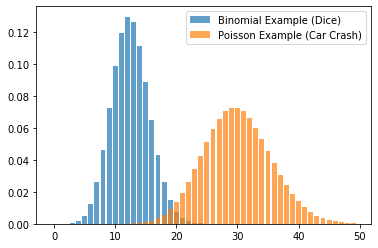

In [13]:
# What is the PMF where we have 50 events and each has a 25% chance of sucessfully happening
# Binomial Distribution
pmf_binom = st.binom.pmf(ks, 50, 0.25)
plt.bar(ks, pmf_binom, label= "Binomial Example (Dice)", alpha = 0.7);

# Poisson Distribution - It is only about Rates. If there is Charecterestic Rate of 30, what would you get

pmf_poisson = st.poisson.pmf(ks, 30)
plt.bar(ks, pmf_poisson, label= "Poisson Example (Car Crash)", alpha = 0.7);
plt.legend();

In [16]:
# What is the Probablity that you get each K

# What is the chance that you roll 10 1's on a D4
print(st.binom.pmf(10, 50, 0.25))

# If we have Charecrerestically 30 Car crashes a night, what is the Probablity of getting 50 crashes

print(st.poisson.pmf(50, 30))


0.09851840993941652
0.00022087848072126846


***

## Continuous Distributions
#### Uniform, Normal, Exponential, Student-T, Log Normal, Skew Normal

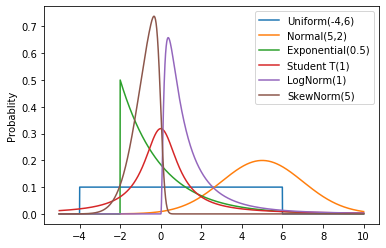

In [22]:
pdf_uniform = st.uniform.pdf(xs, -4, 10) # data, lowerbound, Upperbound
plt.plot(xs, pdf_uniform, label= "Uniform(-4,6)")

pdf_normal = st.norm.pdf(xs, loc=5, scale=2) # Common. Loc and Scale are kind of like Mean(mu) & Std(sigma)
plt.plot(xs, pdf_normal, label= "Normal(5,2)")

pdf_expon = st.expon.pdf(xs, loc=-2, scale=2) # Charecterestic Rate is emulated by Scale
plt.plot(xs, pdf_expon, label= "Exponential(0.5)")

pdf_student = st.t.pdf(xs, 1) # Data, Degrees of Freedom
plt.plot(xs, pdf_student, label= "Student T(1)")

pdf_lognorm = st.lognorm.pdf(xs, 1) # Data, S(How Skewed it is)
plt.plot(xs, pdf_lognorm, label= "LogNorm(1)")

pdf_skewnorm = st.skewnorm.pdf(xs, -6) # Data, alpha(How Skewed it is)
plt.plot(xs, pdf_skewnorm, label= "SkewNorm(5)")

plt.legend();
plt.ylabel("Probablity");

# Instead of PMF we ask for PDF in Continuous Variables

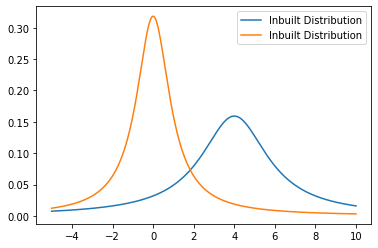

In [25]:
# Check for Mean and Deviation. Shift of Mean
plt.plot(xs, st.t.pdf(xs, 1, loc=4, scale=2), label= "Inbuilt Distribution")
plt.plot(xs, st.t.pdf(xs, 1, loc=0, scale=1), label= "Manual Distribution")

plt.legend();

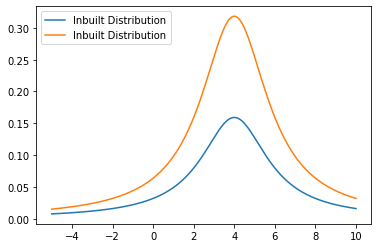

In [26]:
# Check for Mean and Deviation
plt.plot(xs, st.t.pdf(xs, 1, loc=4, scale=2), label= "Inbuilt Distribution")
plt.plot(xs, st.t.pdf((xs-4)/2, 1, loc=0, scale=1), label= "Manual Distribution")

plt.legend();

# Loc and Scale are a convinent way of linear transformation on the Data to shift it around to where it needs to be

****
## Emperical Distributions

In [44]:
xs = [x * 0.5 for x in range(0, 21)]
print(xs[:5])

[0.0, 0.5, 1.0, 1.5, 2.0]


In [47]:
ys = [0.2, 0.165, 0.167,0.166, 0.154, 0.134, 0.117, 0.108, 0.092, 0.06, 0.031, 0.028, 0.048,
     0.077, 0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

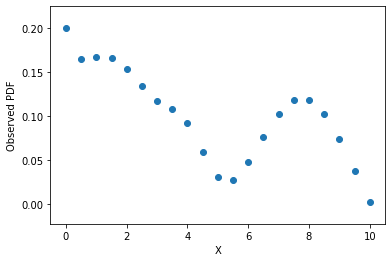

In [50]:
# Plot

plt.scatter(xs, ys)
plt.xlabel("X")
plt.ylabel("Observed PDF");

In [51]:
# The Above is a Non Parametric Distribution
# This is a Coninuous Distribution. So we need to Interpolate between the Data Points

from scipy.interpolate import interp1d

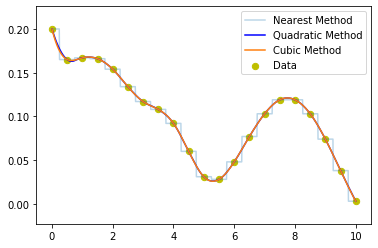

In [67]:
x = np.linspace(min(xs), max(xs), 1000)

# One way of Interpolation
y1 = interp1d(xs, ys)(x) # The interp1d(xs, ys) returns a Function that will be applied to different (x) at diff.positions

# Another way of Interpolation
y2 = interp1d(xs, ys, kind= "nearest")(x) # It gives kind of Steps between Data Points

# Another way of Interpolation
y3 = interp1d(xs, ys, kind= "quadratic")(x) # It gives similar continuous line like normal

# Another way of Interpolation
y4 = interp1d(xs, ys, kind= "cubic")(x) # It is Smooth and Nice. It is like quadratic

# Plot the Interpolated Graphs
plt.scatter(xs, ys, s = 40, c="y", label= "Data")
#plt.plot(x, y1, label="Linear - Default method");
plt.plot(x, y2, label="Nearest Method", alpha = 0.3);
plt.plot(x, y3, label="Quadratic Method", c='b');
plt.plot(x, y4, label="Cubic Method");
plt.legend();

# Linear Interpolation is Linearly Interpolating all our Data Points
# If you want a nice Cubic method of Interpolation, Try Splining

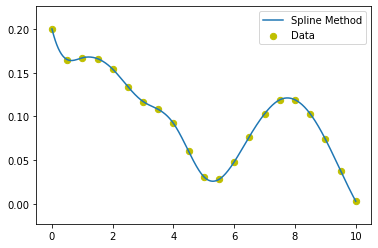

In [71]:
# Splining

from scipy.interpolate import splev, splrep

y5 = splev(x, splrep(xs, ys))
plt.scatter(xs, ys, s = 40, c="y", label= "Data")

plt.plot(x, y5, label="Spline Method");
plt.legend();

# Splining is Numerically faster & efficient than Interpolation. 
# So Stick with linear or Quadratic and Away from nearest.

In [80]:
# With the above methods, we can get Probablity, PDF, CDF, SF etc.,

# We need a way to Integerate the Function we made so that we can use for PDF, CDF and SF
# Integrating can be done using scipy.integrate.trapz -O(h), scipy.integrate.simps O(H^2) (Good Acc), scipy.integrate.quad (High Acc)

# Simps is fast and has good Accuracy
from scipy.integrate import simps

# PDF Function
def get_prob(xs, ys, a, b, resolution=1000): # Bounds - integeral from a to b
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind= "quadratic")(x_norm)
    normalisation = simps(y_norm, x= x_norm)
    x_vals = np.linspace(a, b, resolution)
    y_vals = interp1d(xs, ys, kind= "quadratic")(x_vals)
    return simps(y_vals, x= x_vals) / normalisation

# CDF Function
def get_cdf(xs, ys, v): # values - All values upto v
    return get_prob(xs, ys, min(xs), v)

# Survival Function
def get_sf(xs, ys, v):
    return get_prob(xs, ys, v, max(xs))
    #return 1 - get_cdf(xs, ys, v)

In [81]:
# If any values from 0 - 10 will be present in the data -> Probab 1 (100% Present) as the data goes from 0 to 10
print(get_prob(xs, ys, 0, 10))

1.0


Text(7, 0.05, 'p = 0.31')

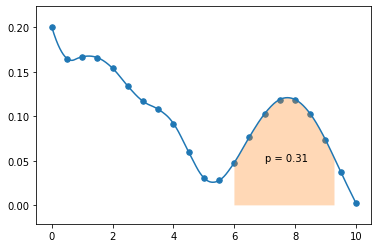

In [102]:
# Case - Probablity Distribution Function
v1, v2 = 6, 9.3
# Find the Area under the Curve
area = get_prob(xs, ys, v1, v2)

plt.scatter(xs, ys, s=30, label= "Data")
plt.plot(x, y3, linestyle = "-", label="Quadratic Interpolation") # Put Quadratic Interpolation code here
plt.fill_between(x, 0, y3, where= (x >= v1)&(x <= v2), alpha=0.3)
plt.annotate("p = {}".format(round(area, 2)), xy= (7, 0.05)) # Location to Start/put the Text is stated as xs - 7.05

In [103]:
# With the above we can say fairly confidently that the Probablity of getting value between 6 and 9.3 is 31%

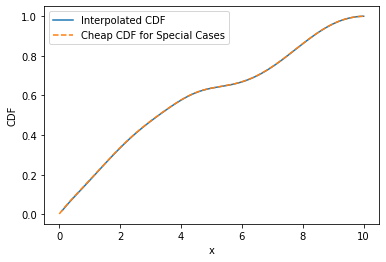

In [109]:
# CDF Function

x_new = np.linspace(min(xs), max(xs), 100)

# List Comprehension for Evaluating Every value in CDF (Expensive way)
cdf_new = [get_cdf(xs, ys, i) for i in x_new]

# Cheap way of CDF - Get the Sum of all Quadratic Object, Done using interp1D
cheap_cdf = y3.cumsum() / y3.sum()

# Plot them 
plt.plot(x_new, cdf_new, label= "Interpolated CDF")
plt.plot(x, cheap_cdf, label= "Cheap CDF for Special Cases", linestyle = "--")
plt.ylabel("CDF")
plt.xlabel("x")
plt.legend();

In [112]:
print(y3[:10])
print(y3.cumsum()[:10]) # Last no + next one + ...; Kind of used like lead vs lag
print(y3.sum())
print(len(y3))

[0.2        0.1988714  0.19776028 0.19666664 0.19559049 0.19453182
 0.19349063 0.19246693 0.19146071 0.19047197]
[0.2        0.3988714  0.59663167 0.79329832 0.9888888  1.18342062
 1.37691125 1.56937818 1.76083889 1.95131086]
100.13092733890825
1000


***

## Sampling Distributions

In [113]:
# rvs is all you need for Scipy

# Importing the Libraries for Stats

from scipy.stats import norm, uniform
from scipy.integrate import simps

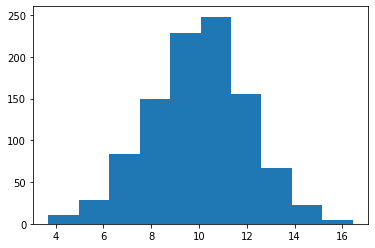

In [117]:
# Sample from Normal Distribution, having mean(loc) 10 and std(scale) 2

plt.hist(norm.rvs(loc=10, scale=2, size=1000));

In [124]:
# Distribution of Sample for Rolling 3 Normal dice

samples = np.ceil(uniform.rvs(loc=0, scale=6, size=(10000, 3)))
samplesum = np.ceil(uniform.rvs(loc=0, scale=6, size=(10000, 3))).sum(axis=1)
print(samples[:10])
print(samplesum[:10])

[[5. 3. 3.]
 [3. 3. 2.]
 [6. 1. 3.]
 [5. 2. 3.]
 [3. 2. 5.]
 [1. 1. 6.]
 [4. 3. 3.]
 [2. 6. 3.]
 [5. 6. 5.]
 [1. 3. 2.]]
[ 9.  5.  9. 12. 12. 13.  9. 13.  8. 13.]


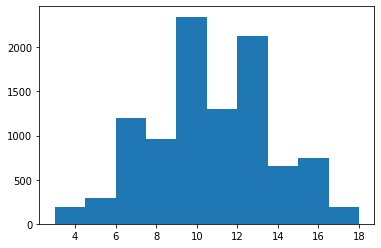

In [125]:
plt.hist(samplesum);

Rejection Sampling
- Sample a uniform x value
- Sample a uniform y value from 0 to max prob in PDF
- if y > pdf(x) throw out the point

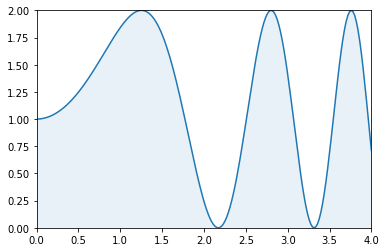

In [127]:
# Try Sampling from Unnormalised distribution p(x) = sin(x^2) + 1, from 0 to 4

# Rejection Sampling Function

def pdf(x):
    return np.sin(x**2) + 1

xs = np.linspace(0, 4, 200)
ps = pdf(xs)

# Plot
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha= 0.1)
plt.xlim(0,4)
plt.ylim(0,2);

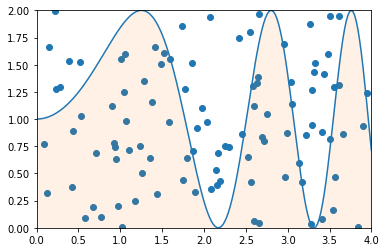

In [131]:
# We must get the Samples majorly from top and very minimal from Bottom

num_samp = 100

random_x = uniform.rvs(loc=0, scale=4, size=num_samp) # As x limits from 0 - 4
random_y = uniform.rvs(loc=0, scale=2, size=num_samp) # As y limits from 0 - 2

# Plot
plt.scatter(random_x, random_y)
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha= 0.1)
plt.xlim(0,4), plt.ylim(0,2);

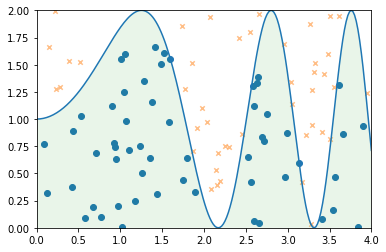

In [133]:
# Select Only values from the Sample if y is less

passed = random_y <= pdf(random_x) # Boolean

# Plot
plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~ passed], random_y[~ passed], marker= 'x', s=20, alpha= 0.5) # ~ Boolean Inversion
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha= 0.1)
plt.xlim(0,4), plt.ylim(0,2);

# Atleast Half the Value was Rejected which was loss of CPU Cycle time., Ineffeciency of Rejection Method

In [134]:
# Inverse CDF

def pdf(x):
    return 3 * x ** 2
def cdf(x):
    return x ** 3
def icdf(cdf):
    return cdf ** (1/3)

((0, 1), (0, 1))

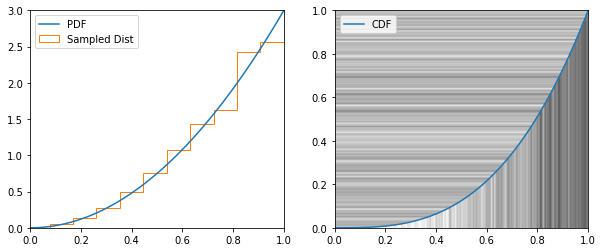

In [139]:
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)

n = 2000 # Samples
u_samps = uniform.rvs(size=n)

x_samps = icdf(u_samps)

# Plot
fig, axes = plt.subplots(ncols = 2, figsize = (10, 4)) # We have 2 axes as we have 2 columns
axes[0].plot(xs, pdfs, label= "PDF")
axes[0].hist(x_samps, density= True, histtype="step", label= "Sampled Dist")
axes[1].plot(xs, cdfs, label= "CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha= 0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha= 0.3)

axes[0].legend(), axes[1].legend();

# Set x and y limits

axes[0].set_xlim(0,1), axes[0].set_ylim(0,3)
axes[1].set_xlim(0,1), axes[1].set_ylim(0,1)

# We Used ICDF to get the function. Note majority of Samples were taken after 0.7 as easily shown CDF (2nd) plot

((0, 4), (0, 1))

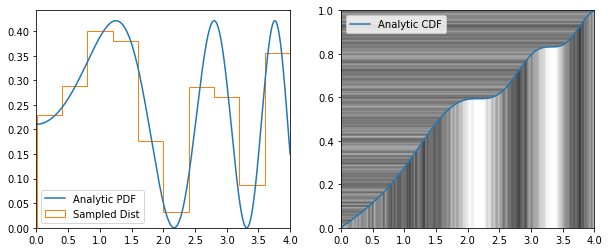

In [142]:
# Create a Rejection Sampling for an Analytical CDF

def pdf(x):
    return np.sin(x ** 2) + 1
xs = np.linspace(0,4, 10000)
pdfs = pdf(xs)
cdfs = pdfs.cumsum() / pdfs.sum() # Dangerous as it may give error., as The First element should be 0, whereas here it is 1/10000

u_samps = uniform.rvs(size = 4000)
x_samps = interp1d(cdfs, xs)(u_samps) # Here the error may occur, if the value is super-close to 0


# Plot
fig, axes = plt.subplots(ncols = 2, figsize = (10, 4)) # We have 2 axes as we have 2 columns
axes[0].plot(xs, pdfs/4.747, label= "Analytic PDF")
axes[0].hist(x_samps, density= True, histtype="step", label= "Sampled Dist")
axes[1].plot(xs, cdfs, label= "Analytic CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha= 0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha= 0.3)

axes[0].legend(loc=3), axes[1].legend(loc=2);

# Set x and y limits

axes[0].set_xlim(0,4)
axes[1].set_xlim(0,4), axes[1].set_ylim(0,1)

***

## Central Limit Theoram

In [143]:
# "The Distribution of Sample Means is Normally Distributed"

# Create a Non Gaussian Distribution
from scipy.stats import expon, skewnorm

In [146]:
# Create a Non Gaussian Data Function

def get_data(n):
    data = np.concatenate((expon.rvs(scale=1, size= n//2), skewnorm.rvs(5, loc=3, size= n//2)))
    np.random.shuffle(data)
    return data

In [152]:
print(get_data(2000))
get_data(2000).mean()

[3.19262759 3.18084728 0.22874631 ... 0.57941963 4.31083852 3.69102914]


2.4018877814277992

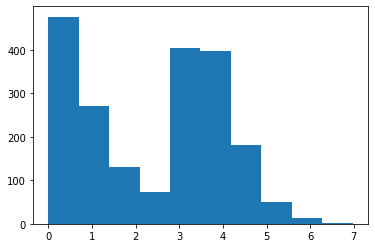

In [148]:
plt.hist(get_data(2000));

In [149]:
# This is not a Normal/Gaussian Distribution, but check next

means = [get_data(2000).mean() for i in range(1000)]

0.018937919215012367


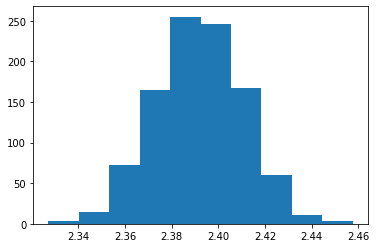

In [151]:
plt.hist(means);
print(np.std(means))

# The More data you gather, the closer you will be to the Actual mean of the Population

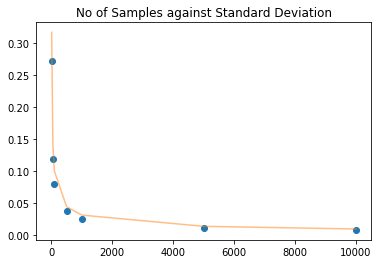

In [156]:
# Do the Plot forr Different Means

num_samps = [10, 50, 100, 500, 1000, 5000, 10000]
stds = []

for n in num_samps:
    stds.append(np.std([get_data(n).mean() for i in range(1000)]))

# Plots

plt.plot(num_samps, stds, 'o', label= "Obs Scatter")
plt.plot(num_samps, 1 / np.sqrt(num_samps), label= "Random Function", alpha= 0.5)
plt.title("No of Samples against Standard Deviation");
# We can see that Standard Deviation is related to inverse squareroot of the Sample

If you have N samples, the mean of the Sample is distributed as per a normal around the True mean, with Standard deviation of sigma/sqrt(n)

In [159]:
# Example

n = 1000
data = get_data(n)
sample_mean = np.mean(data)
uncert_mean = np.std(data) / np.sqrt(n)
print("We have determined the Mean of Population to be {} +- {}".format(round(sample_mean, 2), round(uncert_mean, 2)))

# Note +- reprecents a 1 Sigma bounce

We have determined the Mean of Population to be 2.37 +- 0.05


CLT allows us to relate the Summary Statistics of the Sample to the Actual Underfying values in the parent Population 
with some well defined Probablity. It allows us to Essentially Quantify the Population Mean with Uncertainity analysis, which we can Probogate forward to any other part of Analysis